In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
root_folder = '/content/drive/MyDrive/dance'

In [ ]:
import os
subfolder_name = 'bharatnatyam'
subfolder_path = os.path.join(root_folder, subfolder_name)

In [ ]:
import os

data = []  # To store video file paths
labels = []  # To store class labels

# Iterate through class subfolders
for class_name in os.listdir(subfolder_path):
    class_folder = os.path.join(subfolder_path, class_name)

    # Check if it's a directory
    if os.path.isdir(class_folder):
        # Iterate through video files in the class folder
        for video_file in os.listdir(class_folder):
            if video_file.endswith(".mp4"):  # Assuming your videos have .mp4 extension
                video_path = os.path.join(class_folder, video_file)
                data.append(video_path)
                labels.append(class_name)

In [ ]:
from sklearn.utils import shuffle
data, labels = shuffle(data, labels, random_state=42)

In [ ]:
data

['/content/drive/MyDrive/dance/bharatnatyam/t2/9th link - Trim_2 - Trim1.mp4',
 '/content/drive/MyDrive/dance/bharatnatyam/t5/9th link - Trim_5.mp4',
 '/content/drive/MyDrive/dance/bharatnatyam/t3/9th link - Trim_3 - Trim3.mp4',
 '/content/drive/MyDrive/dance/bharatnatyam/t2/9th link - Trim_2 - Trim2.mp4',
 '/content/drive/MyDrive/dance/bharatnatyam/t4/11th link - Trim3.mp4',
 '/content/drive/MyDrive/dance/bharatnatyam/t3/11th link - Trim3.mp4',
 '/content/drive/MyDrive/dance/bharatnatyam/t4/9th link - Trim_4 - Trim1.mp4',
 '/content/drive/MyDrive/dance/bharatnatyam/t1/9th link - Trim_1 - Trim1.mp4',
 '/content/drive/MyDrive/dance/bharatnatyam/t5/10th link - Trim1.mp4',
 '/content/drive/MyDrive/dance/bharatnatyam/t4/9th link - Trim_4 - Trim3.mp4',
 '/content/drive/MyDrive/dance/bharatnatyam/t7/9th link - Trim_7.mp4',
 '/content/drive/MyDrive/dance/bharatnatyam/t2/10th link - Trim1.mp4',
 '/content/drive/MyDrive/dance/bharatnatyam/t8/11th link - Trim2.mp4',
 '/content/drive/MyDrive/danc

In [ ]:
import pandas as pd
df = pd.DataFrame({'Data': data, 'Labels': labels})

In [ ]:
df

,Data,Labels
0,/content/drive/MyDrive/dance/bharatnatyam/t2/9...,t2
1,/content/drive/MyDrive/dance/bharatnatyam/t5/9...,t5
2,/content/drive/MyDrive/dance/bharatnatyam/t3/9...,t3
3,/content/drive/MyDrive/dance/bharatnatyam/t2/9...,t2
4,/content/drive/MyDrive/dance/bharatnatyam/t4/1...,t4
...,...,...
74,/content/drive/MyDrive/dance/bharatnatyam/t3/9...,t3
75,/content/drive/MyDrive/dance/bharatnatyam/t8/9...,t8
76,/content/drive/MyDrive/dance/bharatnatyam/t1/9...,t1
77,/content/drive/MyDrive/dance/bharatnatyam/t4/1...,t4


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

import cv2
import matplotlib.pyplot as plt
import random

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten, InputLayer
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Flatten, InputLayer, Conv2D, MaxPooling2D
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import ConvLSTM2D, MaxPooling3D, TimeDistributed

In [ ]:
video_directory = subfolder_path

In [ ]:
categories = ['t1','t2','t3','t4','t5','t6','t7','t8']

In [ ]:
num_videos_per_category = 10

In [ ]:
num_images_per_row = 4
image_width = 80
image_height = 80

In [ ]:
for category in categories:
    category_directory = os.path.join(video_directory, category)
    videos = os.listdir(category_directory)

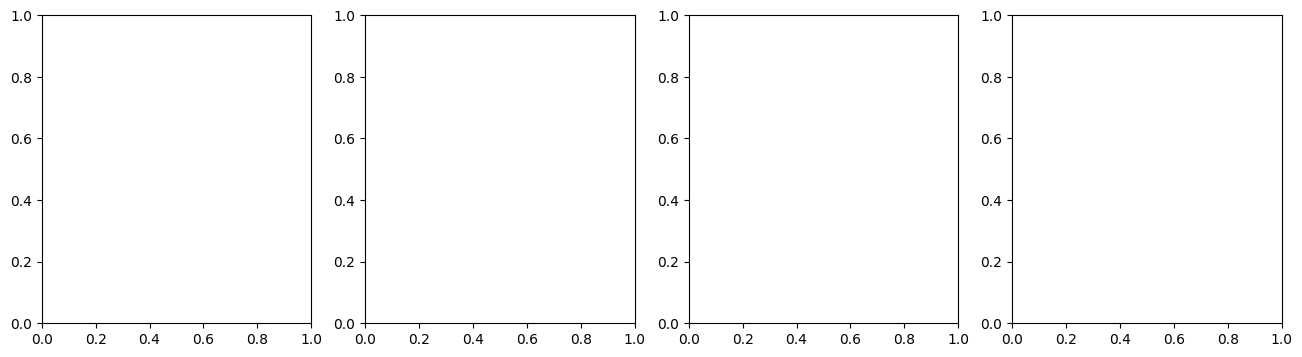

In [ ]:
 fig, axs = plt.subplots(1, num_images_per_row, figsize=(16, 4))

In [ ]:
height , width = 64, 64
SEQUENCE_LENGTH = 20
DATASET_DIR = subfolder_path


In [ ]:
import cv2

def extraction_images(video_path):



    frames_list = []

    video_reader = cv2.VideoCapture(video_path)
    video_frames_count = int(video_reader.get(cv2.CAP_PROP_FRAME_COUNT))

    skip_frames_window = max(int(video_frames_count / SEQUENCE_LENGTH), 1)

    for frame_counter in range(SEQUENCE_LENGTH):


        video_reader.set(cv2.CAP_PROP_POS_FRAMES, frame_counter * skip_frames_window)


        success, frame = video_reader.read()


        if not success:
            break


        resized_frame = cv2.resize(frame, (width, height))


        normalized_frame = resized_frame / 255


        frames_list.append(normalized_frame)


    video_reader.release()


    return frames_list

In [ ]:
import numpy as np
def create_dataset():



    features = []
    labels = []
    video_files_paths = []


    for class_index, class_name in enumerate(['t1','t2','t3','t4','t5','t6','t7','t8']):


        print(f'Extracting class data : {class_name}')


        files_list = os.listdir(os.path.join(DATASET_DIR, class_name))


        for file_name in files_list:


            video_file_path = os.path.join(DATASET_DIR, class_name, file_name)

            images = extraction_images(video_file_path)


            if len(images) == SEQUENCE_LENGTH:


                features.append(images)
                labels.append(class_index)
                video_files_paths.append(video_file_path)


    features = np.asarray(features)
    labels = np.array(labels)


    return features, labels, video_files_paths

In [ ]:
features, labels, video_files_paths = create_dataset()

Extracting class data : t1
Extracting class data : t2
Extracting class data : t3
Extracting class data : t4
Extracting class data : t5
Extracting class data : t6
Extracting class data : t7
Extracting class data : t8


In [ ]:
one_hot_encoded_labels = to_categorical(labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, one_hot_encoded_labels, test_size = 0.25, shuffle = True)

In [ ]:
model = Sequential()


model.add(ConvLSTM2D(filters = 4, kernel_size = (3, 3), activation = 'tanh',data_format = "channels_last",
                     recurrent_dropout=0.2, return_sequences=True, input_shape = (SEQUENCE_LENGTH,
                                                                                  height, width, 3)))

model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
model.add(TimeDistributed(Dropout(0.2)))

model.add(ConvLSTM2D(filters = 8, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                     recurrent_dropout=0.2, return_sequences=True))

model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
model.add(TimeDistributed(Dropout(0.2)))

model.add(ConvLSTM2D(filters = 14, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                     recurrent_dropout=0.2, return_sequences=True))

model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))
model.add(TimeDistributed(Dropout(0.2)))

model.add(ConvLSTM2D(filters = 16, kernel_size = (3, 3), activation = 'tanh', data_format = "channels_last",
                     recurrent_dropout=0.2, return_sequences=True))

model.add(MaxPooling3D(pool_size=(1, 2, 2), padding='same', data_format='channels_last'))

model.add(Flatten())

model.add(Dense(len(categories), activation = "softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, 20, 62, 62, 4)     1024      
                                                                 
 max_pooling3d (MaxPooling3  (None, 20, 31, 31, 4)     0         
 D)                                                              
                                                                 
 time_distributed (TimeDist  (None, 20, 31, 31, 4)     0         
 ributed)                                                        
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, 20, 29, 29, 8)     3488      
                                                                 
 max_pooling3d_1 (MaxPoolin  (None, 20, 15, 15, 8)     0         
 g3D)                                                            
                                                        

In [ ]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])
histo_fit = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 50, verbose=1)

Epoch 1/50
2/2 [==============================] - 26s 2s/step - loss: 2.0816 - accuracy: 0.0526 - val_loss: 2.0892 - val_accuracy: 0.0500
Epoch 2/50
2/2 [==============================] - 1s 746ms/step - loss: 2.0771 - accuracy: 0.1579 - val_loss: 2.0944 - val_accuracy: 0.0500
Epoch 3/50
2/2 [==============================] - 2s 1s/step - loss: 2.0708 - accuracy: 0.1754 - val_loss: 2.1055 - val_accuracy: 0.0500
Epoch 4/50
2/2 [==============================] - 2s 598ms/step - loss: 2.0679 - accuracy: 0.1579 - val_loss: 2.1274 - val_accuracy: 0.0500
Epoch 5/50
2/2 [==============================] - 1s 542ms/step - loss: 2.0646 - accuracy: 0.1579 - val_loss: 2.1515 - val_accuracy: 0.0500
Epoch 6/50
2/2 [==============================] - 1s 537ms/step - loss: 2.0622 - accuracy: 0.1579 - val_loss: 2.1421 - val_accuracy: 0.0500
Epoch 7/50
2/2 [==============================] - 1s 572ms/step - loss: 2.0595 - accuracy: 0.1579 - val_loss: 2.1481 - val_accuracy: 0.0500
Epoch 8/50
2/2 [=========

In [ ]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Scores')
    plt.legend()
    plt.show()

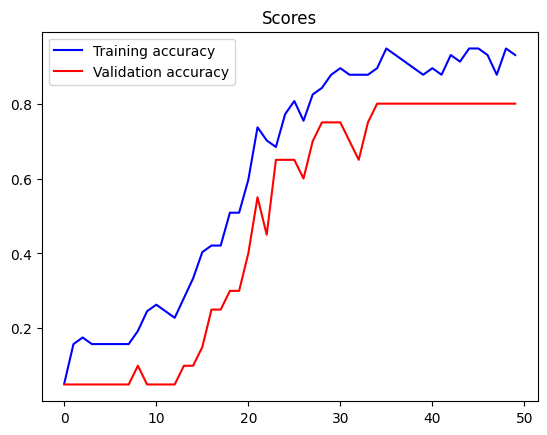

In [ ]:
plot_scores(histo_fit)

In [ ]:
test_metrics = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_metrics[0]}")
print(f"Test Accuracy: {test_metrics[1]}")

1/1 [==============================] - 0s 99ms/step - loss: 0.7918 - accuracy: 0.8000
Test Loss: 0.7917948365211487
Test Accuracy: 0.800000011920929


In [ ]:
y_pred = model.predict(X_test)

1/1 [==============================] - 2s 2s/step


In [ ]:
y_true_labels = [categories[idx] for idx in y_test.argmax(axis=1)]
y_pred_labels = [categories[idx] for idx in y_pred.argmax(axis=1)]


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_true_labels, y_pred_labels, target_names=categories)
print(report)

              precision    recall  f1-score   support

          t1       1.00      1.00      1.00         1
          t2       1.00      1.00      1.00         3
          t3       1.00      1.00      1.00         3
          t4       1.00      0.33      0.50         3
          t5       1.00      1.00      1.00         2
          t6       1.00      0.50      0.67         4
          t7       0.60      1.00      0.75         3
          t8       0.33      1.00      0.50         1

    accuracy                           0.80        20
   macro avg       0.87      0.85      0.80        20
weighted avg       0.91      0.80      0.80        20



In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_true_labels, y_pred_labels, target_names=categories, output_dict=True)


for category in categories:
    print(f"Category: {category}")
    print(f"Precision: {report[category]['precision']}")
    print(f"Recall: {report[category]['recall']}")
    print(f"F1-Score: {report[category]['f1-score']}")
    print(f"Support: {report[category]['support']}")
    print("\n")


Category: t1
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Support: 1


Category: t2
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Support: 3


Category: t3
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Support: 3


Category: t4
Precision: 1.0
Recall: 0.3333333333333333
F1-Score: 0.5
Support: 3


Category: t5
Precision: 1.0
Recall: 1.0
F1-Score: 1.0
Support: 2


Category: t6
Precision: 1.0
Recall: 0.5
F1-Score: 0.6666666666666666
Support: 4


Category: t7
Precision: 0.6
Recall: 1.0
F1-Score: 0.7499999999999999
Support: 3


Category: t8
Precision: 0.3333333333333333
Recall: 1.0
F1-Score: 0.5
Support: 1




In [ ]:
from sklearn.metrics import classification_report

# Assuming you have already generated the classification report
report = classification_report(y_true_labels, y_pred_labels, target_names=categories, output_dict=True)

# Extract overall metrics
overall_metrics = report['weighted avg']

# Print overall metrics
print(f"Overall Accuracy: {accuracy_score(y_true_labels, y_pred_labels)}")
print(f"Overall Precision: {overall_metrics['precision']}")
print(f"Overall Recall: {overall_metrics['recall']}")
print(f"Overall F1-Score: {overall_metrics['f1-score']}")


Overall Accuracy: 0.8
Overall Precision: 0.9066666666666666
Overall Recall: 0.8
Overall F1-Score: 0.7958333333333333


In [ ]:
overall_metrics = report['weighted avg']
overall_accuracy = accuracy_score(y_true_labels, y_pred_labels)
print(f"Overall Accuracy: {overall_accuracy * 100:.2f}%")
print(f"Overall Precision: {overall_metrics['precision'] * 100:.2f}%")
print(f"Overall Recall: {overall_metrics['recall'] * 100:.2f}%")
print(f"Overall F1-Score: {overall_metrics['f1-score'] * 100:.2f}%")


Overall Accuracy: 80.00%
Overall Precision: 90.67%
Overall Recall: 80.00%
Overall F1-Score: 79.58%
